# Getting started with MOM6

* MOM6 variables are staggered according to the Arakawa C-grid 
* It uses a north-east index convention
* center points are labelled (xh, yh) and corner points are labelled (xq, yq)
* important: variables xh/yh, xq/yq that are named "nominal" longitude/latitude **are not** the true geographical coordinates and are not suitable for plotting (more later)

See [indexing](https://mom6.readthedocs.io/en/dev-gfdl/api/generated/pages/Horizontal_indexing.html) for details.

In [1]:
import xarray as xr
from xgcm import Grid
import warnings
import matplotlib.pylab as plt

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

For this tutorial, we are going to use sample data for the $\frac{1}{2}^{\circ}$ global model OM4p05 hosted on a GFDL thredds server:

In [3]:
dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/'

ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
                     chunks={'time':1, 'z_l': 1}, drop_variables=['average_DT',
                                                                  'average_T1',
                                                                  'average_T2'],
                     engine='pydap')

In [4]:
ds

<xarray.Dataset>
Dimensions:       (nv: 2, time: 60, xh: 720, xq: 720, yh: 576, yq: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * xh            (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq            (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 59.0 59.5 60.0
  * yh            (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq            (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * z_i           (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l           (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * time          (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
Data variables:
    Coriolis      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello     (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_bu  (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cu  (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cv  (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    deptho        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    hfgeou        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    sftof         (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    thkcello      (z_l, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    wet           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_c         (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_u         (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_v         (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    so            (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    time_bnds     (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetao        (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    umo           (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    uo            (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vmo           (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vo            (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    volcello      (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    zos           (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
Attributes:
    filename:                        ocean_monthly.200301

## grid variables

* The horizontal dimensions are a combination of (xh or xq) and (yh or yq) corresponding to the staggered point. In the vertical z_l refers to the depth of the center of the layer and z_i to the position of the interfaces, such as len(z_i) = len(z_l) +1.

* the geolon/geolat family are the **TRUE** geographical coordinates and are the longitude/latitude you want to use to plot results. The subscript correspond to the staggered point (c: corner, u: U-point, v: V-point, no subscript: center)

* the areacello family is the area of the ocean cell at various points with a slightly naming convention (bu: corner, cu: U-point, cv: V-point, no subscript: center). The cell area can be computed by:

   $$areacello = dxt * dyt$$

* the dx/dy family has the following naming convention: dx(Cu: U-point, Cv: V-point, no suffix: center)

* thkcello is the layer thickness for each cell (variable). volcello is the volume of the cell, such as:

  $$volcello = areacello * thkcello$$


The MOM6 output can be written in Symetric (**len(Xq) = len(Xh) + 1**) or Non-symetric mode (**len(Xq) = len(Xh)**), where X is a notation for both x and y.




## building a xgcm grid object

[xgcm](https://xgcm.readthedocs.io/en/latest/index.html) adds staggered grid information to xarray. To use its functionalities,
one must define a xgcm grid object. In Symetric mode, one would define the grid for the global as:

```python
grid = Grid(ds, coords={'X': {'inner': 'xh', 'outer': 'xq'},
                        'Y': {'inner': 'yh', 'outer': 'yq'},
                        'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])
```

and in Non-symetric mode:

```python

grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])
```

Of course, **don't forget to drop the periodic option if you're running a regional model**. Our data is written in Non-symetric mode hence:

In [5]:
grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])

## A note on geographical coordinates

MOM6 uses land processor elimination, which creates blank holes in the produced geolon/geolat fields. This can result in problems while plotting. It is recommended to overwrite them by the full arrays that are produced by running the model for a few steps without land processor elimination. Here we copy one of these files.

In [6]:
!curl -O https://raw.githubusercontent.com/raphaeldussin/MOM6-AnalysisCookbook/master/tutorials/data/ocean_grid_sym_OM4_05.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6512k  100 6512k    0     0  6869k      0 --:--:-- --:--:-- --:--:-- 6862k


In [7]:
ocean_grid_sym = xr.open_dataset('ocean_grid_sym_OM4_05.nc')

In [8]:
ocean_grid_sym

<xarray.Dataset>
Dimensions:   (xh: 720, xq: 721, yh: 576, yq: 577)
Coordinates:
  * xh        (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq        (xq) float64 -300.0 -299.5 -299.0 -298.5 ... 58.5 59.0 59.5 60.0
  * yh        (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq        (yq) float64 -78.0 -77.82 -77.63 -77.45 ... 89.37 89.58 89.79 90.0
Data variables:
    geolat    (yh, xh) float32 ...
    geolat_c  (yq, xq) float32 ...
    geolon    (yh, xh) float32 ...
    geolon_c  (yq, xq) float32 ...
Attributes:
    filename:   19000101.ocean_static.nc
    title:      OM4_SIS2_cgrid_05
    grid_type:  regular
    grid_tile:  N/A
    history:    Tue Mar  3 13:41:58 2020: ncks -v geolon,geolon_c,geolat,geol...
    NCO:        4.0.3

I took here a symetric grid for the purpose of showing the differences. Since this grid is symetric and MOM6 uses the north-east convention, we need to remove the first row and column in our arrays.

To overwrite our "gruyere" coordinates in our Non-symetric dataset, we can do:

In [9]:
ds['geolon_c'] = xr.DataArray(data=ocean_grid_sym['geolon_c'][1:,1:], dims=('yq', 'xq'))
ds['geolat_c'] = xr.DataArray(data=ocean_grid_sym['geolat_c'][1:,1:], dims=('yq', 'xq'))

ds['geolon'] = xr.DataArray(data=ocean_grid_sym['geolon'], dims=('yh', 'xh'))
ds['geolat'] = xr.DataArray(data=ocean_grid_sym['geolat'], dims=('yh', 'xh'))

## Plotting

To be able to plot using true longitude and latitude, we need to make geolon/geolat coordinates of the xarray.Dataset:

In [10]:
ds = ds.assign_coords({'geolon': ds['geolon'],
                       'geolat': ds['geolat']})

Now notice the difference in the arctic between nominal (bad) coordinates and the true coordinates:

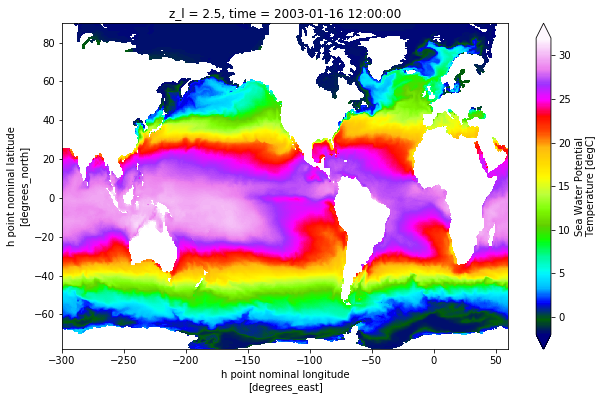

In [11]:
ds['thetao'].isel(time=0, z_l=0).plot(vmin=-2, vmax=32,
                                      cmap='gist_ncar',
                                      figsize=[10, 6])

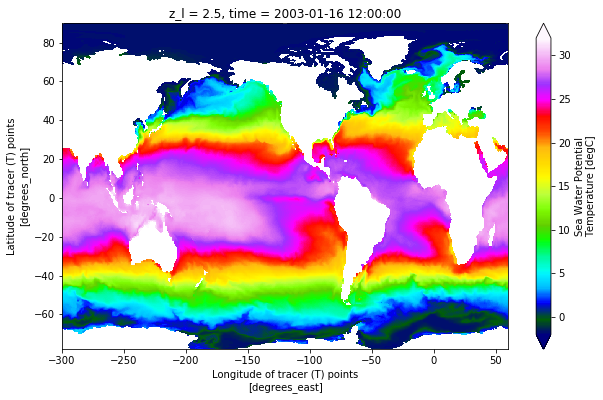

In [12]:
ds['thetao'].isel(time=0, z_l=0).plot(vmin=-2, vmax=32, 
                                      x='geolon', y='geolat', 
                                      cmap='gist_ncar',
                                      figsize=[10, 6])